In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
from PIL import Image
import random
from matplotlib.pyplot import figure
import glob

In [2]:
#Load Yolo v4 on custom trained weights
weights='yolov4_train_last.weights'
configuration='yolov4_train.cfg'
yolov4 = cv2.dnn.readNet(weights,configuration)

In [3]:
classes=['CAR','BUS']

In [4]:
# function for detect objects from images
def detect_object(url,shape=(20,10),accu_score=0.6,box_width=2,text_size=2):
  img = Image.open(url)
  img=np.asarray(img)
  height, width, channels = img.shape
  blob = cv2.dnn.blobFromImage(img, 1/255 , (416 , 416) ,(0,0,0) , swapRB=True , crop=False)
  yolov4.setInput(blob)
  output_layer_name=yolov4.getUnconnectedOutLayersNames()
  layeroutput=yolov4.forward(output_layer_name)

  boxes=[]
  confidences=[]
  class_ids=[]
  for output in layeroutput:
    for detection in output:
      score=detection[5:]
      class_id=np.argmax(detection[5:])
      confidence=score[class_id]
      if confidence >accu_score:
        center_x=int(detection[0]*width)
        center_y=int(detection[1]*height)
        w=int(detection[2]*width)
        h=int(detection[3]*height)

        x=int(center_x-w/2)
        y=int(center_y-h/2)

        boxes.append([x,y,w,h])
        confidences.append(float(confidence))
        class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


  font = cv2.FONT_HERSHEY_PLAIN
  colors=[random.uniform(0,255) for i in range(len(boxes))]
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
  
          label = str(classes[class_ids[i]])
          color = colors[i]
          confi=str(round(confidences[i],2))
  
          cv2.rectangle(img, (x,y), (x + w, y + h), color, box_width)
          cv2.putText(img, label+ " "+confi, (x, y + 0), font, 2, color,text_size)
  print(f'No of object detected = {len(indexes)}')
  figure(num=None,figsize=shape)       
  plt.imshow(img)
  plt.show()



  

In [5]:
files=glob.glob('IMAGES/*')
len(files)

72

No of object detected = 1


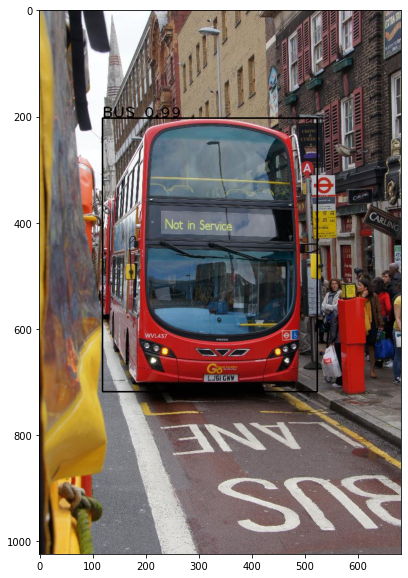

No of object detected = 2


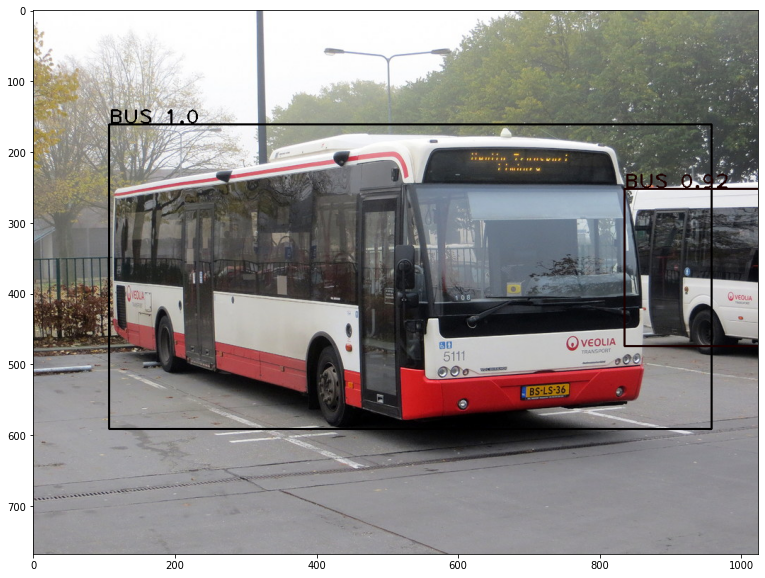

No of object detected = 2


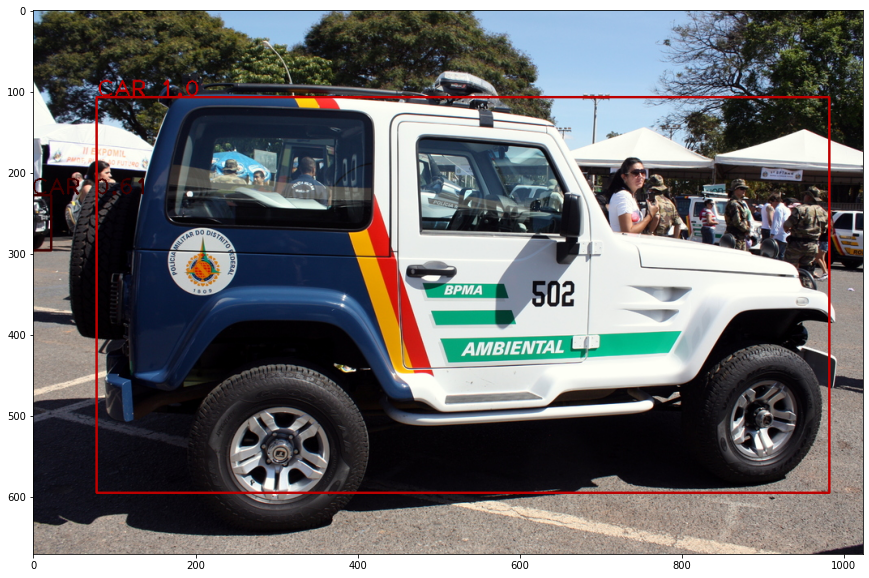

No of object detected = 0


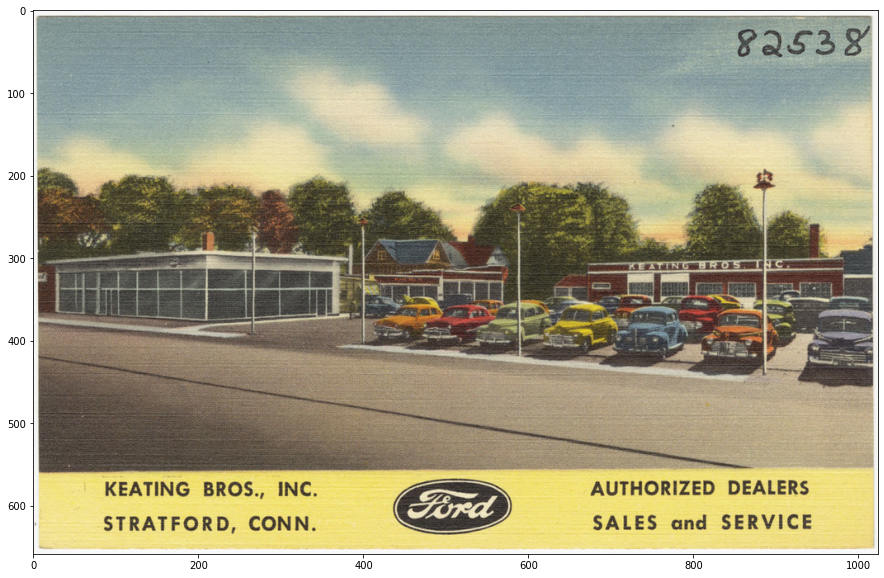

No of object detected = 1


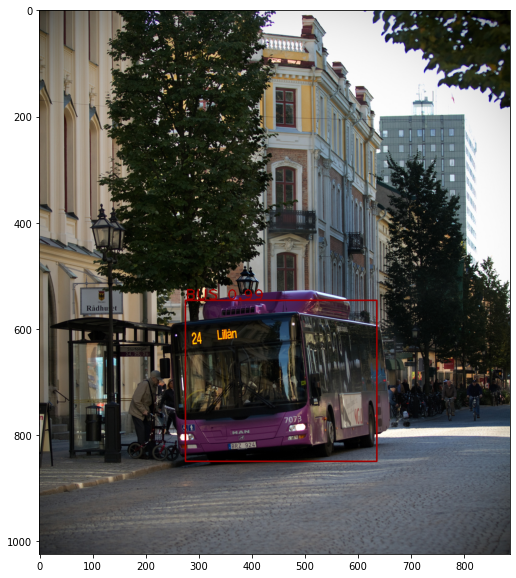

No of object detected = 3


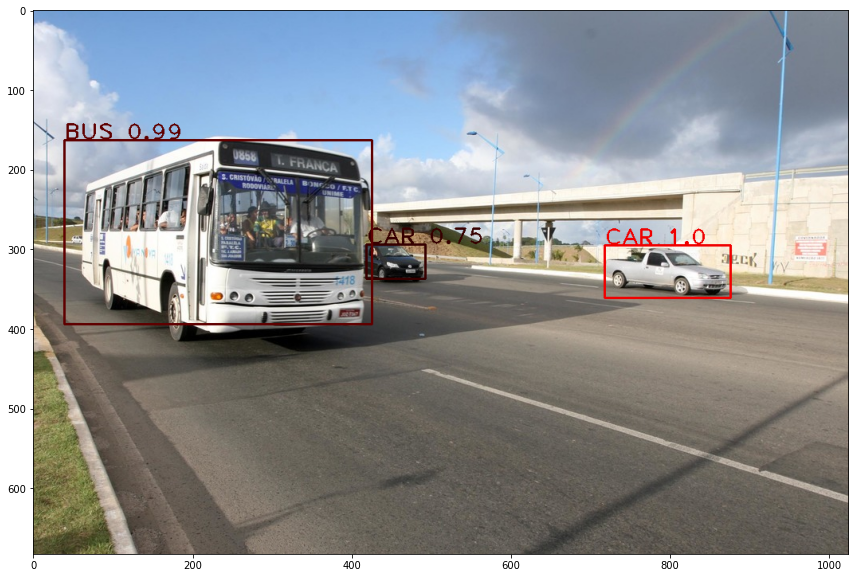

In [9]:
for i in files[0:6]:
    detect_object(i)